# Comparing statistical numbers between groups

Statistical numbers calculated for numerical variables can be compared in groups defined by a categorical variable.

In [1]:
### Import the libraries needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Style affects on layout of the graphics used
### Styles available can be listed using the command plt.style.available
plt.style.use('seaborn-whitegrid')

In [2]:
### Open the data in a dataframe

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data1_en.xlsx')

### Peek the data

df.head()

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
### Create lists of variables using the defined text format

sex = ['Male', 'Female']

education = ['Comprehensive school', 'Upper secondary school', 'Academic degree', 'Higher academic degree']

## groupby() + describe()

Data can be divided into groups using the command <strong>groupby()</strong> and then calculate the statistical numbers.

In [10]:
### Compare statistical numbers of salary  by sexes.

df1 = df.groupby('sex')['salary'].describe()

### Polishing th result is obviously need.

### Headers of the table

df1.index = sex

### Proper names for statistical numbers

df1.columns = ['Count', 'Mean', 'Standard deviation', 'Minimum', 'Lower quartile', 'Median', 'Upper quartile', 'Maximum']

### Also tune the number formats and turn the table

df1.T.style.format('{:.0f}')


,Male,Female
Count,63,19
Mean,2664,2233
Standard deviation,930,341
Minimum,1521,1715
Lower quartile,2086,1969
Median,2417,2144
Upper quartile,2925,2574
Maximum,6278,2729


In [14]:
### Compare statistitical numbers of salary by education

df2 = df.groupby('education')['salary'].describe()

### Tune the headers

df2.index = education

### Tune the number style

df2.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Comprehensive school,27,2310,473,1638,2008,2144,2534,3587
Upper secondary school,30,2403,534,1521,2008,2378,2729,3510
Academic degree,22,2887,1108,1559,2222,2710,2925,6278
Higher academic degree,2,5147,110,5069,5108,5147,5186,5225


## Box and whiskers chart i.e. boxplot

Box and whisker chart is a graphic way to compare statistical numbers. The chart gives the summary of five important statistical numbers (minimum, lower quartile, median, upper quartile, maximum) and outliers. 

Text(0, 0.5, 'Monthly salary')

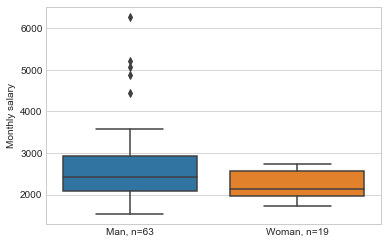

In [27]:
### Compare salary by sex using box and whisker chart.

sns.boxplot(data = df, x = 'sex', y = 'salary')

### And then finalising the chart

### Add the legends for horisontal axis along with n-values

plt.xticks(ticks = [0,1],
          labels = ['Man, n=' + str(df['salary'][df['sex'] == 1].count()),
                    'Woman, n=' + str(df['salary'][df['sex'] == 2].count())])

### Remove the unnecessary horisontal axis title

plt.xlabel('')

### Add vertical axis label

plt.ylabel('Monthly salary')

Text(0, 0.5, 'Monthly salary')

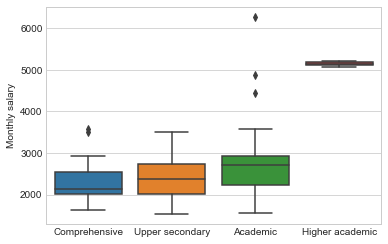

In [31]:
### Compare salary now by education using box and whisker chart.

sns.boxplot(data = df, x = 'education', y = 'salary')

### Anf then some tuning

### Names of education groups from the corresponding list

plt.xticks(ticks = [0, 1, 2, 3], labels = ['Comprehensive', 'Upper secondary', 'Academic', 'Higher academic'])

### Remove the unnecessary horisontal axis title

plt.xlabel('')

### Add vertical axis label

plt.ylabel('Monthly salary')

## Pivot_table()

By default means are calculated for the pivot tables.

In [37]:
### Compare the means of salaries by sex and education.

df3 = df.pivot_table(values = 'salary', index = 'education', columns = 'sex', margins = True)

### New kind of polishing is needed

### Into listst with string values we add a header for the last row and column (Total)

df3.index = education + ['Total']
df3.columns = sex + ['Total']

### Finally, tune the number formats

df3.style.format('{:.0f}')

,Male,Female,Total
Comprehensive school,2354,2121,2310
Upper secondary school,2461,2211,2403
Academic degree,3145,2334,2887
Higher academic degree,5147,nan,5147
Total,2675,2233,2571


## Are differences in means statistically significant?

When conclusions about bigger population are considered based on results calculated from smaller samples of the population, issues about statistical significance need to be considered. 
For instance, differences between groups in a sample may be too small in order to be generalized to the bigger population where the sample is chosen from.
There might be a difference caused by sampling error (randomness) in question. 

Difference is called statistically significant if it can be generalized to a bigger population the sample is chosen from. Significance of difference can be tested by calculating the so-called <strong>p-value</strong>. The smaller the p-value is, the more significant is the difference. Standard practice is that p-values below 0,05, i.e. 5 %, are considered signs of differences that are statistically significant. 

P-value related to comparing means of two groups can be calculated with the so-called t-test of two independent groups (<strong>ttest_ind</strong>). If there are missing values in the data, add the parameter <strong>nan_policy='omit'</strong> for the function.

In [38]:
### Create the groups to be compared

s1 = df['salary'][df['sex'] == 1]  ### group of men
s2 = df['salary'][df['sex'] == 2]  ### group of women

### The t-test of two independent groups (ind stands for independent)
### Import the library

from scipy.stats import ttest_ind

ttest_ind(s1, s2, equal_var = False)

Ttest_indResult(statistic=3.0597612743474714, pvalue=0.003048272029697872)

Hence we can conclude that there is a statistically significant difference between the means of salaries of men (the mean is 2664 euros) and women (the mean is 2233 euros). This is because the p-value calculated by two-tailed t-test of two independent groups is 0,003.

When means of several groups are compared the p-values can be compared using the F-test (<strong>f_oneway</strong>). If the variable considered has missing values in the data, the data has to be replaced by another one where there are no rows with missing values. For instance, if we consider the data of salaries as above we see that there are no missing values. But <em>if there were missing values</em>, then the data obtained from the origal one applied with the command <br />
<center><strong>df.dropna(subset=['salary'])</strong></center>

In [40]:
### Create the groups to be compared

k1 = df['salary'][df['education'] == 1]   ### comprehensive school
k2 = df['salary'][df['education'] == 2]   ### upper secondary school
k3 = df['salary'][df['education'] == 3]   ### academic degree
k4 = df['salary'][df['education'] == 4]   ### higher academic degree

### F-test 

from scipy.stats import f_oneway
f_oneway(k1, k2, k3, k4)

F_onewayResult(statistic=11.675086950951924, pvalue=2.186573534680074e-06)

Here we conclude that there are statistically significant differences between salaries of those with different education. This is because the p-value given by the F-test is 0,000002.

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>